# <center>Noto 7.5 Mw 2024 Earthquake Project</center>
<center>by: Haidir Jibran</center>
<center>haidirjibran@gmail.com</center>

In early 2024, Japan experienced a major earthquake that was quite shocking. In addition to the large number of losses, the earthquake also caused the coastline to shift further out to sea so that some piers could no longer function. In this project, we will display land movement graphs using GPS data and a cross-section of the distribution of earthquake events in recent years to better understand what exactly happened in Noto, Japan while people were celebrating the new year.

<b>1. Import Module and Library</b>

In [10]:
import os
import tqdm
import warnings
import pandas as pd
from glob import glob
import seismosocialdistancing

import matplotlib.pyplot as plt
import matplotlib.image as img

from obspy import UTCDateTime
from obspy import read
from obspy.clients.fdsn import Client
from obspy.clients.fdsn.client import FDSNNoDataException
from obspy.signal import PPSD

<b>2. Earthquake Location</b>

Define the location and timing of earthquakes

In [11]:
eventlatitude = 37.488
eventlongitude = 137.217
eventtime = UTCDateTime('2024-01-01T16:10:00+09')

Retrieving events in the IRIS database and plotting the location of the earthquake

1 Event(s) in Catalog:
2024-01-01T07:10:09.474000Z | +37.489, +137.264 | 7.5  mww


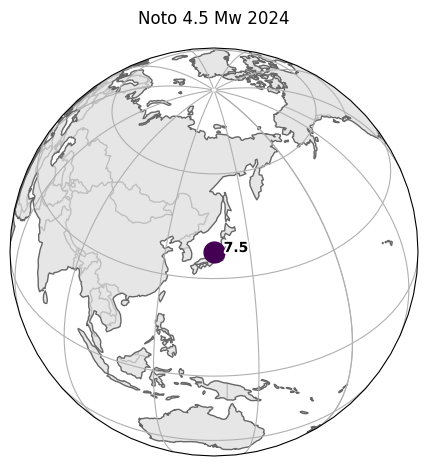

[Origin(resource_id=ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=49462969"), time=UTCDateTime(2024, 1, 1, 7, 10, 9, 474000), longitude=137.2638, latitude=37.4893, depth=10000.0, creation_info=CreationInfo(author='pt,at,us'))]


In [12]:
client = Client('IRIS')
event = client.get_events(starttime=eventtime-10, endtime=eventtime+10, longitude=eventlongitude, latitude=eventlatitude, maxradius=0.5)
print(event)
event.plot(projection='ortho', title="Noto 4.5 Mw 2024")
plt.close()

print(event[0].origins)

<b>3. Identifying the Direction of Earthquake-induced Ground Movement using GPS</b>

The data used is the GPS data at the earthquake-affected location, namely station J971. Next, the minimum and maximum deviation values recorded on the GPS were calculated to be used as upper and lower limits when plotting the data.

In [13]:
os.system('wget -P ./data/ "http://geodesy.unr.edu/gps_timeseries/tenv3/plates/EU/J971.EU.tenv3"')
os.system("awk 'NR>1{print $3,$9}' ./data/J971.EU.tenv3 | gmt minmax")
os.system("awk 'NR>1{print $3,$11}' ./data/J971.EU.tenv3 | gmt minmax")
os.system("awk 'NR>1{print $3,$13}' ./data/J971.EU.tenv3 | gmt minmax")

--2024-09-27 15:15:24--  http://geodesy.unr.edu/gps_timeseries/tenv3/plates/EU/J971.EU.tenv3
Resolving geodesy.unr.edu (geodesy.unr.edu)... 134.197.19.60, 64:ff9b::86c5:133c
Connecting to geodesy.unr.edu (geodesy.unr.edu)|134.197.19.60|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1160760 (1.1M)
Saving to: ‘./data/J971.EU.tenv3.1’

     0K .......... .......... .......... .......... ..........  4%  109K 10s
    50K .......... .......... .......... .......... ..........  8%  223K 7s
   100K .......... .......... .......... .......... .......... 13% 3.26M 5s
   150K .......... .......... .......... .......... .......... 17%  224K 4s
   200K .......... .......... .......... .......... .......... 22% 3.53M 3s
   250K .......... .......... .......... .......... .......... 26% 4.22M 3s
   300K .......... .......... .......... .......... .......... 30% 6.69M 2s
   350K .......... .......... .......... .......... .......... 35%  255K 2s
   400K .......... .......... 

<Standard Input>: N = 5689	<2009.0021/2024.7036>	<-0.63027/1.339071>
<Standard Input>: N = 5689	<2009.0021/2024.7036>	<0.344105/0.900358>
<Standard Input>: N = 5689	<2009.0021/2024.7036>	<0.015832/1.357207>


0

Plotting ground movement recorded on GPS J971

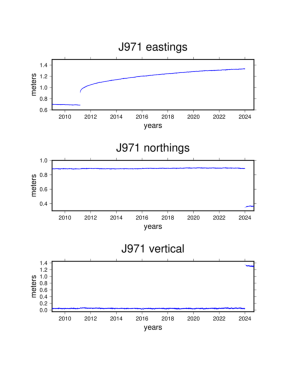

In [14]:
os.system('gmt gmtset PS_PAGE_ORIENTATION = portrait') # set paper orientation
os.system('gmt gmtset PS_MEDIA = letter') # set paper size
os.system('gmt gmtset PROJ_LENGTH_UNIT = inch') # set which unit that we use

# plot easting component
os.system("gmt psbasemap -JX6/1.5 -R2009/2024.7/0.6/1.5 -Ba2:years:/a0.2:meters::.'J971 eastings':WeSn -X1.25 -Y8 -K > ./postscript/plot_gps.ps") # define range of border, range of axis, marker, title, and position of baseplot on the paper
os.system("awk 'NR>1{print $3,$9}' ./data/J971.EU.tenv3 | gmt psxy -J -R -Sc0.01 -Gblue -O -K >> ./postscript/plot_gps.ps") # plot the scatter of data
\
# plot northing component
os.system("gmt psbasemap -JX6/1.5 -R2009/2024.7/0.3/1.0 -Ba2:years:/a0.2:meters::.'J971 northings':WeSn -X0 -Y-3 -O -K >> ./postscript/plot_gps.ps") # define range of border, range of axis, marker, title, and position of baseplot on the paper
os.system("awk 'NR>1{print $3,$11}' ./data/J971.EU.tenv3 | gmt psxy -J -R -Sc0.01 -Gblue -O -K >> ./postscript/plot_gps.ps") # plot the scatter of data

# plot vertical component
os.system("gmt psbasemap -JX6/1.5 -R2009/2024.7/-0.05/1.45 -Ba2:years:/a0.2:meters::.'J971 vertical':WeSn -X0 -Y-3 -O -K >> ./postscript/plot_gps.ps") # define range of border, range of axis, marker, title, and position of baseplot on the paper
os.system("awk 'NR>1{print $3,$13}' ./data/J971.EU.tenv3 | gmt psxy -J -R -Sc0.01 -Gblue -O >> ./postscript/plot_gps.ps") # plot the scatter of data

os.system('gmt psconvert ./postscript/plot_gps.ps -Tg')
plot_plot_gps=img.imread('./postscript/plot_gps.png')
plt.axis('off')
plt.imshow(plot_plot_gps)
plt.show()
plt.close()

From the graph above, it can be seen that a very significant change in the position of the gps occurred due to the earthquake (early 2024) where the land surface rose by no less than 1 meter, this caused changes in the coastline that was more towards the sea, so that the sea was observed away from land.

<b>4. Identifying the Causes of Earthquakes</b>

To better understand why this earthquake occurred, we first wanted to see what tectonic mechanism caused this earthquake to occur. We plotted the event against other earthquakes that occurred with cross-sections to see whether or not this earthquake occurred due to plate subduction in Japan.

The following is the location of the 2024 Noto earthquake as seen from the distribution of earthquakes in the past 5 years.

Received 104.6 MB of event information in 180.8 seconds (592.5 KB/s)
could not find ParserDetails.ini in /usr/local/share/perl/5.34.0/XML/SAX
Processed event information for 5450 events, 5450 origins in 460.9 seconds (232.4 KB/s)
DONE at 2024-09-27 11:01:55


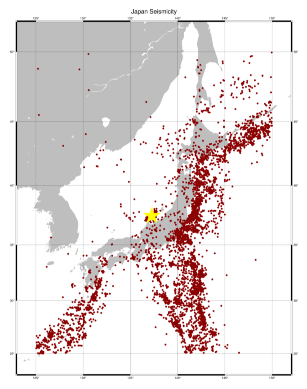

In [6]:
os.system('./FetchEvent -s 2019-08-01,00:00:00 -e 2024-08-31,00:00:00 --lon 125:150 --lat 25:50 --mag 4:10 -o ./data/whole_japan.txt')
os.system('gmt gmtset PS_MEDIA = archE')
os.system('gmt pscoast -R123/152/23/52 -JM15 -Ba5g5/a5g5:."Japan Seismicity":WESN -Ggray -K > ./postscript/whole_japan.ps')
os.system("awk -F'|' '{print $4,$3}' ./data/whole_japan.txt | gmt psxy -R -J -Sc0.1 -Gred4 -O -K >> ./postscript/whole_japan.ps")
os.system('echo 137.264 37.489 | gmt psxy -R -J -Sa1 -Gyellow -O >> ./postscript/whole_japan.ps')
os.system('gmt psconvert ./postscript/whole_japan.ps -A -Tg')
plot_whole_japan=img.imread('./postscript/whole_japan.png')
plt.axis('off')
plt.imshow(plot_whole_japan)
plt.show()
plt.close()

Furthermore, cross-sectional drawings were made on the blue-colored events. cut across east-west, and viewed from the south.

Received 29.7 MB of event information in 28.5 seconds (1.0 MB/s)
could not find ParserDetails.ini in /usr/local/share/perl/5.34.0/XML/SAX
Processed event information for 1533 events, 1533 origins in 101.5 seconds (299.6 KB/s)
DONE at 2024-09-27 11:05:03


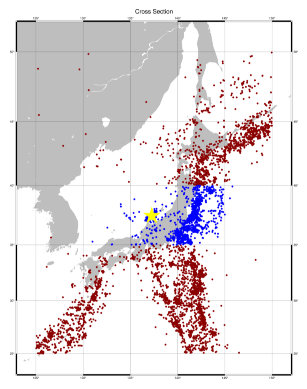

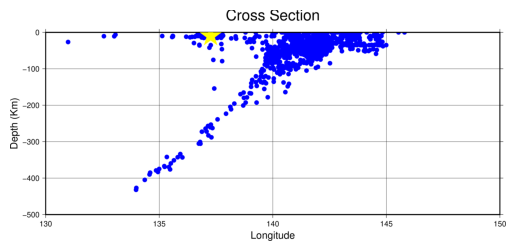

In [7]:
os.system('./FetchEvent -s 2019-08-01,00:00:00 -e 2024-08-31,00:00:00 --lon 130:150 --lat 35:40 --mag 4:10 -o ./data/crosec.txt')
os.system('gmt gmtset PS_MEDIA = archE')
os.system('gmt pscoast -R123/152/23/52 -JM15 -Ba5g5/a5g5:."Cross Section":WESN -Ggray -K > ./postscript/crosec.ps')
os.system("awk -F'|' '{print $4,$3}' ./data/whole_japan.txt | gmt psxy -R -J -Sc0.1 -Gred4 -O -K >> ./postscript/crosec.ps")
os.system("awk -F'|' '{print $4,$3}' ./data/crosec.txt | gmt psxy -R -J -Sc0.1 -Gblue -O -K >> ./postscript/crosec.ps")
os.system('echo 137.264 37.489 | gmt psxy -R -J -Sa1 -Gyellow -O >> ./postscript/crosec.ps')
os.system('gmt psconvert ./postscript/crosec.ps -A -Tg')
plot_crosec=img.imread('./postscript/crosec.png')
plt.axis('off')
plt.imshow(plot_crosec)
plt.show()
plt.close()

os.system("awk -F'|' '{print $4,$5*-1}' ./data/crosec.txt | gmt psxy -R130/150/-500/0 -JX10/4 -Ba5g5:Longitude:/a100g100:'Depth (Km)'::.'Cross Section':WeSn -Sc0.1 -Gblue -K > ./postscript/xsec.ps")
os.system('echo 137.264 -10 | gmt psxy -R -J -Sa0.5 -Gyellow -O >> ./postscript/xsec.ps')
os.system('gmt psconvert ./postscript/xsec.ps -A -Tg')
plot_xsec=img.imread('./postscript/xsec.png')
plt.axis('off')
plt.imshow(plot_xsec)
plt.show()
plt.close()

In this graph, it can be seen that the Noto 7.5 Mw 2024 earthquake did not occur at a subduction site. Instead, it occurred on the opposite side separated by the Japanese mainland. Although it did not occur exactly in the subduction area, the location of this earthquake was an area affected by the pressure of the oceanic plate that subducted under the continental plate, so that this location was pushed up.

<b>5. Identification of seismic noise before and after an earthquake</b>

Next, RMS calculations were performed to determine the changes before and after the earthquake.

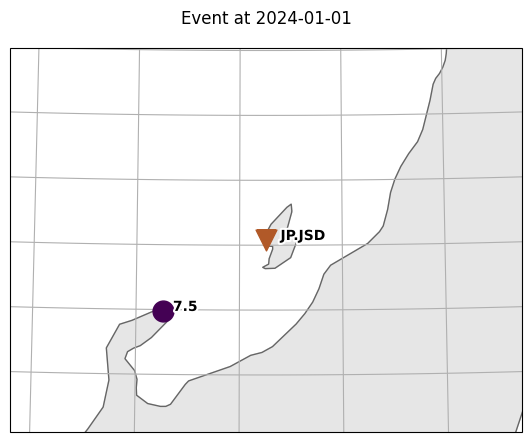

In [15]:
# Make sure you take at least a full week (>=7 days) before the first "ban"
start = UTCDateTime("2023-12-04")
# Leaving UTCDateTime() empty means "now":
end = UTCDateTime("2024-01-28")

near_stations = client.get_stations(starttime=start, endtime=end, 
                                    location=' ,00', channel='BHZ', level='channel', 
                                    longitude=eventlongitude, latitude=eventlatitude,
                                    maxradius=1)

fig = near_stations.plot(projection='local', resolution='h', show=False)
event.plot(projection='local', resolution='h', fig=fig)
plt.close()

In [16]:
network = near_stations[0].code
station = near_stations[0].stations[0].code
location = near_stations[0].stations[0].channels[0].location_code
channel = near_stations[0].stations[0].channels[0].code
dataset = "example"

data_provider = "IRIS"
bans = {"2024-01-01 07:10":'Earthquake Event'}

datelist = pd.date_range(start.datetime, min(end, UTCDateTime()).datetime, freq="D")

In [17]:
c = Client(data_provider)

nslc = "{}.{}.{}.{}".format(network, station, location, channel)
# make sure that wildcard characters are not in nslc
nslc = nslc.replace("*", "").replace("?", "")
pbar = tqdm.tqdm(datelist)
for day in pbar:
    datestr = day.strftime("%Y-%m-%d")
    fn = "{}_{}_{}.mseed".format(dataset, datestr, nslc)
    if day != UTCDateTime().datetime and os.path.isfile(fn):
        continue
    else:
        pbar.set_description("Fetching %s" % fn)
        try: 
            st = c.get_waveforms(network, station, location, channel,
                                  UTCDateTime(day)-1801, UTCDateTime(day)+86400+1801,
                                  attach_response=True)
            # the following two lines here prevent a crash when there is no data on a day
            if len(st) > 0:
                st.write(fn)
        except FDSNNoDataException:
            pbar.set_description("No data on FDSN server for %s" % fn)
            continue
        
resp = c.get_stations(UTCDateTime(day), network=network, station=station, location=location,
                      channel=channel, level="response")
print(resp)

100%|██████████| 56/56 [00:00<00:00, 319.34it/s]


Inventory created at 2024-09-27T07:35:47.125400Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2024-01-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			JP
		Stations (1):
			JP.JSD (Sado)
		Channels (1):
			JP.JSD..BHZ


In [18]:
force_reprocess = False
pbar = tqdm.tqdm(datelist)
for day in pbar:
    datestr = day.strftime("%Y-%m-%d")
    fn_in = "{}_{}_{}.mseed".format(dataset, datestr, nslc)
    pbar.set_description("Processing %s" % fn_in)
    if not os.path.isfile(fn_in):
        continue
    stall = read(fn_in, headonly=True)
    for mseedid in list(set([tr.id for tr in stall])):
        fn_out = "{}_{}_{}.npz".format(dataset, datestr, mseedid)
        if os.path.isfile(fn_out) and not force_reprocess:
            continue
        st = read(fn_in, sourcename=mseedid)
        st.attach_response(resp)
        ppsd = PPSD(st[0].stats, metadata=resp,
                    ppsd_length=1800, overlap=0.5,
                    period_smoothing_width_octaves=0.025,
                    period_step_octaves=0.0125,
                    period_limits=(0.008, 50),
                    db_bins=(-200, 20, 0.25))
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            ppsd.add(st)
        ppsd.save_npz(fn_out[:-4])
        del st, ppsd
    del stall

Processing example_2023-12-04_JP.JSD..BHZ.mseed:   0%|          | 0/56 [00:00<?, ?it/s]

Processing example_2024-01-28_JP.JSD..BHZ.mseed: 100%|██████████| 56/56 [00:06<00:00,  8.95it/s]


In [19]:
ppsds = {}
pbar = tqdm.tqdm(datelist)
for day in pbar:
    datestr = day.strftime("%Y-%m-%d")
    fn_pattern = "{}_{}_*.npz".format(dataset, datestr)
    pbar.set_description("Reading %s" % fn_pattern)
    for fn in glob(fn_pattern):
        mseedid = fn.replace(".npz", "").split("_")[-1]
        if mseedid not in ppsds:
            ppsds[mseedid] = PPSD.load_npz(fn)#, allow_pickle=True)
        else:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                ppsds[mseedid].add_npz(fn)#, allow_pickle=True)

Reading example_2024-01-28_*.npz: 100%|██████████| 56/56 [00:02<00:00, 20.77it/s]


In [20]:
# Define frequency bands of interest:
freqs = [(0.1,1.0),(1.0,20.0),(4.0,14.0),(4.0,20.0)]

displacement_RMS = {}
for mseedid, ppsd in tqdm.tqdm(ppsds.items()):
    ind_times = pd.DatetimeIndex([d.datetime for d in ppsd.current_times_used])
    data = pd.DataFrame(ppsd.psd_values, index=ind_times, columns=1./ppsd.period_bin_centers)
    data = data.sort_index(axis=1)
    displacement_RMS[mseedid] = seismosocialdistancing.df_rms(data, freqs, output="DISP")
    displacement_RMS[mseedid].to_csv("%s.csv" % mseedid)

100%|██████████| 1/1 [00:13<00:00, 13.77s/it]


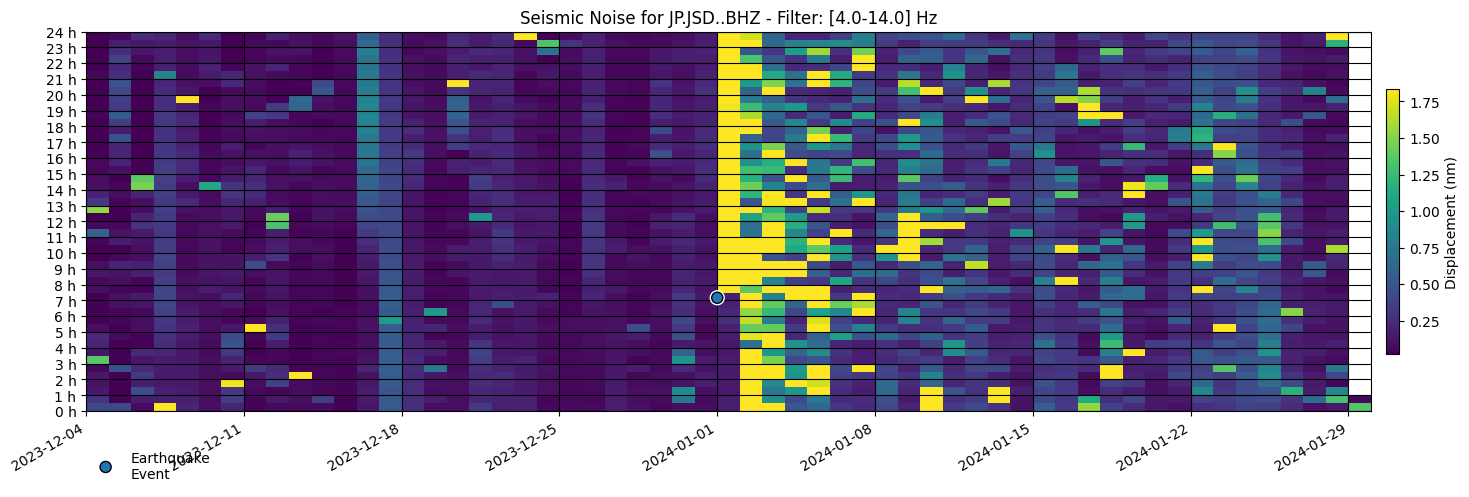

In [21]:
args = {'band':"4.0-14.0",  #"4.0-14.0",       # might be None or commented ("4.0-14.0" per default) or any of the tupples in freqs
        'bans':bans,             # might be None or commented
        'save':'./',              # might be None or commented or a path 
        'unit':'nm'
       }

seismosocialdistancing.plot(displacement_RMS,
                            type='gridmaps',
                            **args)

The figure above shows the significant changes in seismic noise that occurred a month before and after the earthquake. It can be seen that in the first two to three days after the earthquake, seismic noise was higher than usual, and continued to decrease thereafter but has not recovered after a month.

The results of this seismic noise calculation were actually beyond our expectations. we expected a decrease in seismic noise like the one that occurred when the lockdown due to covid 19 occurred due to the reduced activity of residents after the earthquake. but what we got was the opposite. to explain this situation, we still need to do a lot of work.